# Exploring Transactions Data

Source: [IBM Synthetic Credit Card Transactions Dataset on Kaggle](https://www.kaggle.com/datasets/ealtman2019/credit-card-transactions)

In [1]:
import joblib
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: f"{x:.2f}")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-Process

In [2]:
COL_NAMES = ['User','Card','Year','Month','Day','Time','Amount','Use_Chip',
                 'Merchant_Name','Merchant_City','Merchant_State','Zip','MCC','Errors','Is_Fraud']
PARSE_DATES = ['Year', 'Month', 'Day', 'Time']

In [3]:
from src import process_data

In [4]:
tdf = pd.read_csv('data/split/newcutaa', header=None, names=COL_NAMES)
process_data.combine_date_cols(columns=PARSE_DATES, result_col='Datetime', df=tdf)

In [5]:
process_data.get_numeric_amount(df=tdf)
tdf = process_data.save_space(tdf)

In [6]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439999 entries, 0 to 2439998
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   User            int32         
 1   Card            int32         
 2   Amount          float32       
 3   Use_Chip        object        
 4   Merchant_Name   int32         
 5   Merchant_City   object        
 6   Merchant_State  object        
 7   Zip             float32       
 8   MCC             int32         
 9   Errors          object        
 10  Is_Fraud        object        
 11  Datetime        datetime64[ns]
dtypes: datetime64[ns](1), float32(2), int32(4), object(5)
memory usage: 167.5+ MB


In [7]:
tdf.head(3)

,User,Card,Amount,Use_Chip,Merchant_Name,Merchant_City,Merchant_State,Zip,MCC,Errors,Is_Fraud,Datetime
0,0,0,134.09,Swipe,1719741273,La Verne,CA,91750.00,5300,NaN,No,2002-09-01 06:21:00
1,0,0,38.48,Swipe,1102623989,Monterey Park,CA,91754.00,5411,NaN,No,2002-09-01 06:42:00
2,0,0,120.34,Swipe,1102623989,Monterey Park,CA,91754.00,5411,NaN,No,2002-09-02 06:22:00


In [8]:
tdf['User'] = tdf['User'].astype(np.int8)
tdf['Card'] = tdf['Card'].astype(np.int8)
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439999 entries, 0 to 2439998
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   User            int8          
 1   Card            int8          
 2   Amount          float32       
 3   Use_Chip        object        
 4   Merchant_Name   int32         
 5   Merchant_City   object        
 6   Merchant_State  object        
 7   Zip             float32       
 8   MCC             int32         
 9   Errors          object        
 10  Is_Fraud        object        
 11  Datetime        datetime64[ns]
dtypes: datetime64[ns](1), float32(2), int32(2), int8(2), object(5)
memory usage: 153.6+ MB


In [10]:
tdf['Amount'] = tdf['Amount'].apply(lambda value: float(value[1:]))
tdf['Amount'] = tdf['Amount'].astype('float32')
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int32  
 1   Card            int32  
 2   Year            int32  
 3   Month           int32  
 4   Day             int32  
 5   Time            object 
 6   Amount          float32
 7   Use Chip        object 
 8   Merchant City   object 
 9   Merchant State  object 
 10  Zip             float32
 11  MCC             int32  
 12  Errors?         object 
 13  Is Fraud?       object 
dtypes: float32(2), int32(6), object(6)
memory usage: 1.8+ GB


In [11]:
tdf['Use Chip'].value_counts()

Use Chip
Swipe Transaction     15386082
Chip Transaction       6287598
Online Transaction     2713220
Name: count, dtype: int64

In [11]:
tdf['Use Chip'] = tdf['Use Chip'].apply(lambda word: word.split()[0])
tdf['Use Chip'].value_counts()

Use Chip
Swipe     15386082
Chip       6287598
Online     2713220
Name: count, dtype: int64

In [13]:
tdf.info()
joblib.dump(tdf, 'data/slimmed_before_datetime_combine')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int32  
 1   Card            int32  
 2   Year            int32  
 3   Month           int32  
 4   Day             int32  
 5   Time            object 
 6   Amount          float32
 7   Use Chip        object 
 8   Merchant City   object 
 9   Merchant State  object 
 10  Zip             float32
 11  MCC             int32  
 12  Errors?         object 
 13  Is Fraud?       object 
dtypes: float32(2), int32(6), object(6)
memory usage: 1.8+ GB


['data/slimmed_before_datetime_combine']

### Combine Datetime Columns

In [2]:
tdf = joblib.load('data/slimmed_before_datetime_combine')
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int32  
 1   Card            int32  
 2   Year            int32  
 3   Month           int32  
 4   Day             int32  
 5   Time            object 
 6   Amount          float32
 7   Use Chip        object 
 8   Merchant City   object 
 9   Merchant State  object 
 10  Zip             float32
 11  MCC             int32  
 12  Errors?         object 
 13  Is Fraud?       object 
dtypes: float32(2), int32(6), object(6)
memory usage: 1.8+ GB


In [5]:
tdf['Time'].sample(n=10)

13759342    15:12
14806318    10:40
6794274     06:57
8576284     08:58
18437265    09:37
10345942    08:33
22962013    14:15
6004777     22:02
8124608     08:02
12818088    16:47
Name: Time, dtype: object

In [6]:
tdf.describe()

,User,Card,Year,Month,Day,Merchant Name,Zip,MCC
count,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.150876e+07,2.438690e+07
mean,1.001019e+03,1.351366e+00,2.011955e+03,6.525064e+00,1.571812e+01,-4.769230e+17,5.095644e+04,5.561171e+03
std,5.694612e+02,1.407154e+00,5.105921e+00,3.472355e+00,8.794073e+00,4.758940e+18,2.939707e+04,8.793154e+02
min,0.000000e+00,0.000000e+00,1.991000e+03,1.000000e+00,1.000000e+00,-9.222899e+18,5.010000e+02,1.711000e+03
25%,5.100000e+02,0.000000e+00,2.008000e+03,3.000000e+00,8.000000e+00,-4.500543e+18,2.837400e+04,5.300000e+03
50%,1.006000e+03,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,-7.946765e+17,4.674200e+04,5.499000e+03
75%,1.477000e+03,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,3.189517e+18,7.756400e+04,5.812000e+03
max,1.999000e+03,8.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,9.223292e+18,9.992800e+04,9.402000e+03


In [3]:
from src.process_data import get_zero_padded

In [4]:
tdf['Month'] = tdf['Month'].apply(get_zero_padded)
tdf['Day'] = tdf['Day'].apply(get_zero_padded)
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int32  
 1   Card            int32  
 2   Year            int32  
 3   Month           object 
 4   Day             object 
 5   Time            object 
 6   Amount          float32
 7   Use Chip        object 
 8   Merchant City   object 
 9   Merchant State  object 
 10  Zip             float32
 11  MCC             int32  
 12  Errors?         object 
 13  Is Fraud?       object 
dtypes: float32(2), int32(4), object(8)
memory usage: 2.0+ GB


In [5]:
joblib.dump(tdf, 'data/padded_month_day')

['data/padded_month_day']

In [6]:
tdf['transaction_datetime'] = pd.to_datetime(tdf[['Year', 'Month', 'Day']], format='%Y-%m-%d', errors='coerce')
tdf.drop(columns=['Year', 'Month', 'Day'], inplace=True)

In [7]:
joblib.dump(tdf, 'data/dates_combined')
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   User                  int32         
 1   Card                  int32         
 2   Time                  object        
 3   Amount                float32       
 4   Use Chip              object        
 5   Merchant City         object        
 6   Merchant State        object        
 7   Zip                   float32       
 8   MCC                   int32         
 9   Errors?               object        
 10  Is Fraud?             object        
 11  transaction_datetime  datetime64[ns]
dtypes: datetime64[ns](1), float32(2), int32(3), object(6)
memory usage: 1.7+ GB


In [9]:
tdf['Is Fraud?'].value_counts()

Is Fraud?
No     24357143
Yes       29757
Name: count, dtype: int64

In [12]:
tdf['is_fraud'] = tdf['Is Fraud?'].apply(lambda word: True if word.lower() == 'yes' else False)
tdf[['Is Fraud?', 'is_fraud']].sample(n=3)

,Is Fraud?,is_fraud
14682773,No,False
21065811,No,False
24211945,No,False


In [13]:
tdf = tdf.drop(columns=['Is Fraud?'])
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   User                  int32         
 1   Card                  int32         
 2   Time                  object        
 3   Amount                float32       
 4   Use Chip              object        
 5   Merchant City         object        
 6   Merchant State        object        
 7   Zip                   float32       
 8   MCC                   int32         
 9   Errors?               object        
 10  transaction_datetime  datetime64[ns]
 11  is_fraud              bool          
dtypes: bool(1), datetime64[ns](1), float32(2), int32(3), object(5)
memory usage: 1.6+ GB


In [14]:
joblib.dump(tdf, 'data/target_variable_into_bool')

['data/target_variable_into_bool']

In [15]:
tdf['Time'] = pd.to_datetime(tdf['Time'], format='%H:%M', errors='coerce').dt.time
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   User                  int32         
 1   Card                  int32         
 2   Time                  object        
 3   Amount                float32       
 4   Use Chip              object        
 5   Merchant City         object        
 6   Merchant State        object        
 7   Zip                   float32       
 8   MCC                   int32         
 9   Errors?               object        
 10  transaction_datetime  datetime64[ns]
 11  is_fraud              bool          
dtypes: bool(1), datetime64[ns](1), float32(2), int32(3), object(5)
memory usage: 1.6+ GB


In [16]:
tdf.head(3)

,User,Card,Time,Amount,Use Chip,Merchant City,Merchant State,Zip,MCC,Errors?,transaction_datetime,is_fraud
0,0,0,06:21:00,134.09,Swipe,La Verne,CA,91750.00,5300,NaN,2002-09-01,False
1,0,0,06:42:00,38.48,Swipe,Monterey Park,CA,91754.00,5411,NaN,2002-09-01,False
2,0,0,06:22:00,120.34,Swipe,Monterey Park,CA,91754.00,5411,NaN,2002-09-02,False


In [23]:
tdf['combined_datetime'] = tdf.apply(lambda row: pd.Timestamp.combine(row['transaction_datetime'], tdf['Time']), axis=1)
tdf[['transaction_datetime', 'Time', 'combined_datetime']].sample(n=3)

: 

## Visuals

In [4]:
tdf = joblib.load('data/target_variable_into_bool')

TypeError: NDFrame.describe() got an unexpected keyword argument 'datetime_is_numeric'

In [5]:
tdf.describe()

,User,Card,Amount,Zip,MCC,transaction_datetime
count,24386900.00,24386900.00,24386900.00,21508765.00,24386900.00,24386900
mean,1001.02,1.35,43.63,50956.43,5561.17,2012-06-15 04:02:37.738722816
min,0.00,0.00,-500.00,501.00,1711.00,1991-01-02 00:00:00
25%,510.00,0.00,9.20,28374.00,5300.00,2008-12-25 00:00:00
50%,1006.00,1.00,30.14,46742.00,5499.00,2013-01-11 00:00:00
75%,1477.00,2.00,65.06,77564.00,5812.00,2016-08-27 00:00:00
max,1999.00,8.00,12390.50,99928.00,9402.00,2020-02-28 00:00:00
std,569.46,1.41,78.69,29042.73,879.32,NaN


In [6]:
tdf.head(3)

,User,Card,Time,Amount,Use Chip,Merchant City,Merchant State,Zip,MCC,Errors?,transaction_datetime,is_fraud
0,0,0,06:21,134.09,Swipe,La Verne,CA,91750.00,5300,NaN,2002-09-01,False
1,0,0,06:42,38.48,Swipe,Monterey Park,CA,91754.00,5411,NaN,2002-09-01,False
2,0,0,06:22,120.34,Swipe,Monterey Park,CA,91754.00,5411,NaN,2002-09-02,False


In [7]:
fdf = tdf.loc[tdf['is_fraud']].copy()
fdf.describe()

,User,Card,Amount,Zip,MCC,transaction_datetime
count,29757.00,29757.00,29757.00,4905.00,29757.00,29757
mean,1011.04,1.62,108.59,52427.47,5252.21,2012-06-21 20:45:19.145075200
min,0.00,0.00,-500.00,1057.00,3000.00,1996-07-05 00:00:00
25%,545.00,0.00,18.36,32503.00,4829.00,2008-09-29 00:00:00
50%,1020.00,1.00,71.02,44824.00,5311.00,2012-08-03 00:00:00
75%,1487.00,3.00,150.13,78374.00,5719.00,2016-03-24 00:00:00
max,1997.00,8.00,5694.44,99504.00,9402.00,2019-10-27 00:00:00
std,559.30,1.52,201.17,28360.61,989.61,NaN


In [19]:
len(fdf.loc[fdf['MCC'] == 4829])

1607

In [20]:
len(df.loc[df['MCC'] == 4829])

1127454

In [8]:
df = tdf.loc[~tdf['is_fraud']].copy()
df.describe()

,User,Card,Amount,Zip,MCC,transaction_datetime
count,24357143.00,24357143.00,24357143.00,21503860.00,24357143.00,24357143
mean,1001.01,1.35,43.55,50956.14,5561.55,2012-06-15 03:50:50.913139968
min,0.00,0.00,-500.00,501.00,1711.00,1991-01-02 00:00:00
25%,510.00,0.00,9.20,28374.00,5300.00,2008-12-25 00:00:00
50%,1006.00,1.00,30.11,46742.00,5499.00,2013-01-11 00:00:00
75%,1477.00,2.00,65.00,77564.00,5812.00,2016-08-28 00:00:00
max,1999.00,8.00,12390.50,99928.00,9402.00,2020-02-28 00:00:00
std,569.47,1.41,78.41,29045.67,879.11,NaN


In [9]:
del tdf

In [10]:
joblib.dump(fdf, 'data/fraud_only')

['data/fraud_only']

In [11]:
joblib.dump(df, 'data/no_fraud')

['data/no_fraud']

In [16]:
sns.set(rc={'figure.figsize': (2, 8)})

/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


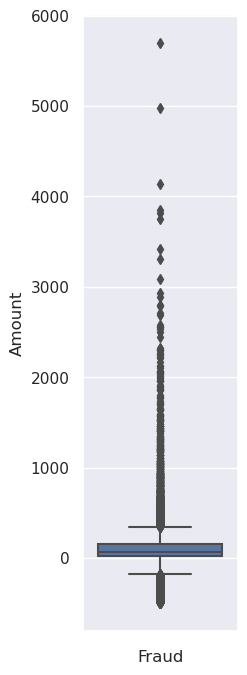

In [17]:
sns.boxplot(y=fdf['Amount'])
plt.xlabel('Fraud')
plt.show()

/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


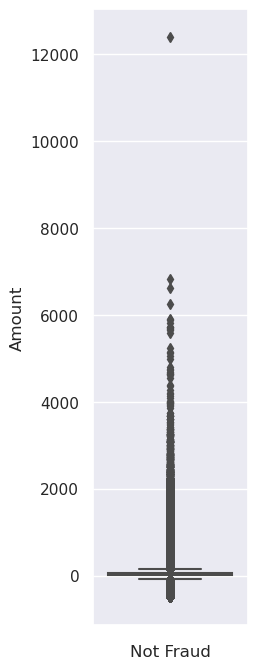

In [18]:
sns.boxplot(y=df['Amount'])
plt.xlabel('Not Fraud')
plt.show()

In [22]:
fdf['MCC'].value_counts()

MCC
5311    4824
5300    2201
5310    2152
4829    1607
5912    1057
        ... 
7802      15
7230      14
7531      11
8041       5
8049       3
Name: count, Length: 98, dtype: int64

In [23]:
df['MCC'].value_counts()

MCC
5411    2859795
5499    2680349
5541    2638628
5812    1797593
5912    1406579
         ...   
3075        626
3007        625
3144        579
5733        369
4411        317
Name: count, Length: 109, dtype: int64

In [24]:
sns.set(rc={'figure.figsize': (8, 5)})

/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


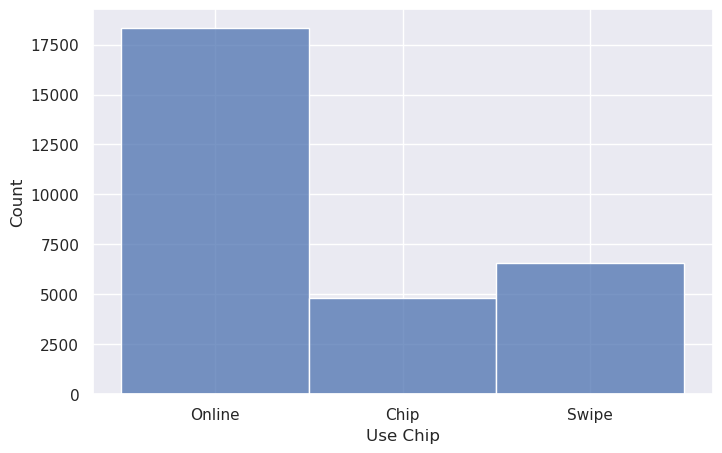

In [25]:
sns.histplot(data=fdf['Use Chip'])
plt.show()

/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yichenzhang/anaconda3/envs/ece5831-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


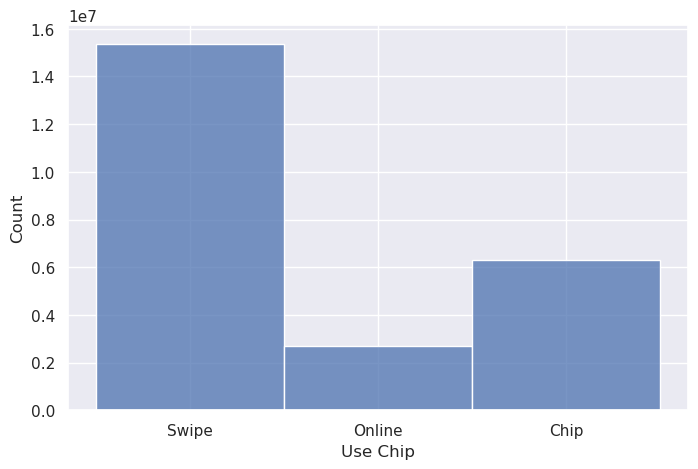

In [26]:
sns.histplot(data=df['Use Chip'])
plt.show()